## An Anaysis of the US gun deaths between the years 2012 and 2014.

In this notebook, I am going to look at data on the "guns.csv" dataset to discover any meaningful patterns. Each row is a gun death victim, and each column has information about the victim:
 - year of death (2012-2014)
 - month of death (1-12)
 - intent of death (suicide, homicide, accidental, etc.)
 - police involvment (0=false,1=true)
 - sex (male, female)
 - age (varied)
 - race (black, hispanic, asian/pacific islander, white, native american)
 - place of death (home, street, etc.)
 - education of victim (key for this column is presented later)

In [1]:
import csv

f = open("guns.csv", "r")
data = list(csv.reader(f))
print(data[:5])

[['', 'year', 'month', 'intent', 'police', 'sex', 'age', 'race', 'hispanic', 'place', 'education'], ['1', '2012', '01', 'Suicide', '0', 'M', '34', 'Asian/Pacific Islander', '100', 'Home', '4'], ['2', '2012', '01', 'Suicide', '0', 'F', '21', 'White', '100', 'Street', '3'], ['3', '2012', '01', 'Suicide', '0', 'M', '60', 'White', '100', 'Other specified', '4'], ['4', '2012', '02', 'Suicide', '0', 'M', '64', 'White', '100', 'Home', '4']]


In [2]:
headers = data[0]
data = data[1:]
print(data[:5])

[['1', '2012', '01', 'Suicide', '0', 'M', '34', 'Asian/Pacific Islander', '100', 'Home', '4'], ['2', '2012', '01', 'Suicide', '0', 'F', '21', 'White', '100', 'Street', '3'], ['3', '2012', '01', 'Suicide', '0', 'M', '60', 'White', '100', 'Other specified', '4'], ['4', '2012', '02', 'Suicide', '0', 'M', '64', 'White', '100', 'Home', '4'], ['5', '2012', '02', 'Suicide', '0', 'M', '31', 'White', '100', 'Other specified', '2']]


In [3]:
years = [a[1] for a in data]

years_counts = {}
for a in years:
    if a in years_counts:
        years_counts[a] = years_counts[a] + 1
    else:
        years_counts[a] = 1
print(years_counts)

# dictionary with year/deaths as key/values
# deaths didnt change much over the years 2012-2014
years_counts

{'2012': 33563, '2013': 33636, '2014': 33599}


{'2012': 33563, '2013': 33636, '2014': 33599}

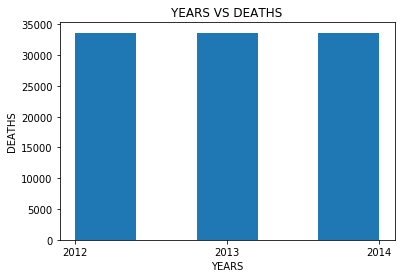

In [11]:
import matplotlib.pyplot as plt

plt.hist(years, bins=5)
plt.title('YEARS VS DEATHS')
plt.xlabel('YEARS')
plt.ylabel('DEATHS')
plt.show()

In [5]:
# converted years and month column into datetime and stored in "dates" variable

import datetime

dates = [datetime.datetime(int(a[1]), int(a[2]), day=1) for a in data]


# created dictionary with deaths by date(year,month in datetime) are counted.
date_counts = {}
for a in dates:
    if a in date_counts:
        date_counts[a] = date_counts[a] + 1
    else:
        date_counts[a] = 1
date_counts

{datetime.datetime(2012, 1, 1, 0, 0): 2758,
 datetime.datetime(2012, 2, 1, 0, 0): 2357,
 datetime.datetime(2012, 3, 1, 0, 0): 2743,
 datetime.datetime(2012, 4, 1, 0, 0): 2795,
 datetime.datetime(2012, 5, 1, 0, 0): 2999,
 datetime.datetime(2012, 6, 1, 0, 0): 2826,
 datetime.datetime(2012, 7, 1, 0, 0): 3026,
 datetime.datetime(2012, 8, 1, 0, 0): 2954,
 datetime.datetime(2012, 9, 1, 0, 0): 2852,
 datetime.datetime(2012, 10, 1, 0, 0): 2733,
 datetime.datetime(2012, 11, 1, 0, 0): 2729,
 datetime.datetime(2012, 12, 1, 0, 0): 2791,
 datetime.datetime(2013, 1, 1, 0, 0): 2864,
 datetime.datetime(2013, 2, 1, 0, 0): 2375,
 datetime.datetime(2013, 3, 1, 0, 0): 2862,
 datetime.datetime(2013, 4, 1, 0, 0): 2798,
 datetime.datetime(2013, 5, 1, 0, 0): 2806,
 datetime.datetime(2013, 6, 1, 0, 0): 2920,
 datetime.datetime(2013, 7, 1, 0, 0): 3079,
 datetime.datetime(2013, 8, 1, 0, 0): 2859,
 datetime.datetime(2013, 9, 1, 0, 0): 2742,
 datetime.datetime(2013, 10, 1, 0, 0): 2808,
 datetime.datetime(2013, 11,

It appears that the gun deaths spiked slightly in the summer months, but not by much.

In [35]:
# exploring gun deaths by race and gender

sexes = [a[5] for a in data]
races = [a[7] for a in data]
ages = [a[6] for a in data]

# creating a dictionary where deaths by gender (M or F) are counted.
sex_counts = {}
for a in sexes:
    if a in sex_counts:
        sex_counts[a] = sex_counts[a] + 1
    else:
        sex_counts[a] = 1

# creating a dictionary where deaths by race (Asian/Pacific Islander, White, Black, Native American/Native) are counted.  
race_counts = {}
for a in races:
    if a in race_counts:
        race_counts[a] = race_counts[a] + 1
    else:
        race_counts[a] = 1



In [36]:
sex_counts

{'F': 14449, 'M': 86349}

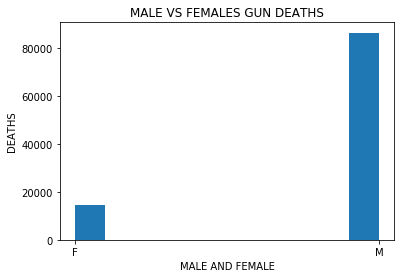

In [37]:
plt.hist(sexes)
plt.title('MALE VS FEMALES GUN DEATHS')
plt.xlabel('MALE AND FEMALE')
plt.ylabel('DEATHS')
plt.show()

Far more males died by guns between the years 2012 and 2014 - almost 6X as many males.

In [38]:
race_counts

{'Asian/Pacific Islander': 1326,
 'Black': 23296,
 'Hispanic': 9022,
 'Native American/Native Alaskan': 917,
 'White': 66237}

In [39]:
# creating a dictionary with place/deaths

place = [a[9] for a in data]

place_counts = {}
for a in place:
    if a in place_counts:
        place_counts[a] = place_counts[a] + 1
    else:
        place_counts[a] = 1
place_counts

{'Farm': 470,
 'Home': 60486,
 'Industrial/construction': 248,
 'NA': 1384,
 'Other specified': 13751,
 'Other unspecified': 8867,
 'Residential institution': 203,
 'School/instiution': 671,
 'Sports': 128,
 'Street': 11151,
 'Trade/service area': 3439}

After some data cleaning and counting, I discovered some interesting starting points for further analysis. I wanted to count how many gun deaths were male or female, and the race category. So I created dictionaries to count the deaths by gender and race, storing them as key/value pairs. The counts revealed that more males died by a gun in the years 2012-2014, than did females (86,349 males and 14,449 females). I also saw how gun deaths related to race. 
    - Asian/Pacific Islander: 1,326
    - Black: 2,3296
    - Hispanic: 9,022
    - Native American/Native Alaskan: 917
    - White: 66237
The data revealed that out of the total 100,798 deaths by guns in the years 2012-2014, the white group had the most deaths. This lead me to wonder how these figures would relate to the total number of whites in the US population - if the total population figures are much larger, the actual proportion may be much smaller. Unless I know the actual proportion of each race in the US, I won't be able to meaningfully compare those numbers. What I need then is a rate of gun deaths per 100,000 people of each race. In order to do this, I needed to read in data about what percentage of the US population falls into each racial category. The data contains information on the total population of the US, as well as the total population of each racial group in the US. The data is stored in the census.csv file, and only consists of two rows.

In [40]:
# reading in census data 
f = open("census.csv", "r")
census = list(csv.reader(f))
print(census)

[['Id', 'Year', 'Id', 'Sex', 'Id', 'Hispanic Origin', 'Id', 'Id2', 'Geography', 'Total', 'Race Alone - White', 'Race Alone - Hispanic', 'Race Alone - Black or African American', 'Race Alone - American Indian and Alaska Native', 'Race Alone - Asian', 'Race Alone - Native Hawaiian and Other Pacific Islander', 'Two or More Races'], ['cen42010', 'April 1, 2010 Census', 'totsex', 'Both Sexes', 'tothisp', 'Total', '0100000US', '', 'United States', '308745538', '197318956', '44618105', '40250635', '3739506', '15159516', '674625', '6984195']]


In [41]:
mapping = {
    "Asian/Pacific Islander": 15159516 + 674625,
    "Native American/Native Alaskan": 3739506,
    "Black": 40250635,
    "Hispanic": 44618105,
    "White": 197318956
}

race_per_hundredk = {}
for k,v in race_counts.items():
    race_per_hundredk[k] = (v / mapping[k]) * 100000

race_per_hundredk

{'Asian/Pacific Islander': 8.374309664161762,
 'Black': 57.8773477735196,
 'Hispanic': 20.220491210910907,
 'Native American/Native Alaskan': 24.521955573811088,
 'White': 33.56849303419181}

In order to get from the raw counts of gun deaths by race to a rate of gun deaths per 100,000 people in each race, I needed to divide the total number of gun deaths by the population of each race. From the census dataset, I know that the number of people in the white racial category is 197,318,956. I then divide 66,237 (the number of gun deaths in the white racial group) by 197,318,956 (total population of white racial group in US) to get 0.00034 - a tiny figure. This figure multiplied by 100,000 gives me the gun death rate per 100,000 people in that racial group. Which tells me the number of people killed in a given group, out of every 100,000 that were killed by guns in the US. For example:
    66,237/197,318,956 = 0.00034 * 100,000 = 33.56. 
We can interpret this figure as "33.56 whites out of every 100,000 people in the white census race category in the US were killed by guns between 2012 and 2014."

After creating another dictionary with the keys as the different racial groups and the values as the rate per 100,000, we learned something interesting. Previously, we saw that the white racial group had the most deaths. Now, after calculating the rate per 100,000, there is a shift in ranking. The black racial group had the highest rate (57.88), white (33.57) and asian/pacific islanders had the lowest rate (8.37). 

In [42]:
# creating a dictionary with intents/deaths
intent = [a[3] for a in data]

intent_counts = {}
for a in intent:
    if a in intent_counts:
        intent_counts[a] = intent_counts[a] + 1
    else:
        intent_counts[a] = 1
intent_counts

{'Accidental': 1639,
 'Homicide': 35176,
 'NA': 1,
 'Suicide': 63175,
 'Undetermined': 807}

In [45]:
# creating a dictionary that has the homicide gun deaths categorized by race
# then creating another dictionary that has the death rate by race per 100,000
homicide_race_counts = {}
for i,race in enumerate(races):
    if race not in homicide_race_counts:
        homicide_race_counts[race] = 0
    if intent[i] == "Homicide":
        homicide_race_counts[race] += 1
homicide_race_counts

{'Asian/Pacific Islander': 559,
 'Black': 19510,
 'Hispanic': 5634,
 'Native American/Native Alaskan': 326,
 'White': 9147}

I now wanted to know how races related to homicides. So I created a dictionary that isolated the "Homicide" gun deaths and counted how many homicides happened per racial group. I learned that the black group had the highest homicide count (19,510), and the Native American/Native Alaskan group had the lowest (326).

In [44]:
homicide_race_per_hundredk = {}
for k,v in homicide_race_counts.items():
    homicide_race_per_hundredk[k] = (v/mapping[k]) * 100000

homicide_race_per_hundredk

{'Asian/Pacific Islander': 3.530346230970155,
 'Black': 48.471284987180944,
 'Hispanic': 12.627161104219914,
 'Native American/Native Alaskan': 8.717729026240365,
 'White': 4.6356417981453335}

Then I wanted to know the homicide_race per hundred 100,000. So I created another dictionary that stored the rates. I then saw that the black and Hispanic groups were disproportionately affected. Blacks had the highest homicide rate (48.47), and Hispanics had the second highest (12.63). The Asian/Pacific Islanders had the lowest rate (3.53).

Now, I would like to investigate other variables. I will explore the link between gender and homicides.

In [46]:
# exploring the link between gender and homicides.
homicide_gender_counts = {}
for i,gender in enumerate(sexes):
    if gender not in homicide_gender_counts:
        homicide_gender_counts[gender] = 0
    if intent[i] == "Homicide":
        homicide_gender_counts[gender] += 1
homicide_gender_counts 

{'F': 5373, 'M': 29803}

Here I created a dictionary that counted how many males died by homicide and how many females died by homicide. Far more males died by homicide. 

Now, I would like to see how suicides relates to gender.

In [47]:
# exploring the relationship between suicides and females.
suicide_gender_counts = {}
for i,gender in enumerate(sexes):
    if gender not in suicide_gender_counts:
        suicide_gender_counts[gender] = 0
    if intent[i] == "Suicide":
        suicide_gender_counts[gender] += 1
suicide_gender_counts

{'F': 8689, 'M': 54486}

I created a dictionary that counted how many males died by suicide and how many females died by suicide. Far more males died by suicide.

What about the relationship between suicide and race.

In [48]:
# exploring the relationship between suicide and race.
suicide_race_counts = {}
for i,race in enumerate(races):
    if race not in suicide_race_counts:
        suicide_race_counts[race] = 0
    if intent[i] == "Suicide":
        suicide_race_counts[race] += 1
suicide_race_counts

{'Asian/Pacific Islander': 745,
 'Black': 3332,
 'Hispanic': 3171,
 'Native American/Native Alaskan': 555,
 'White': 55372}

I created another dictionary that counted how many deaths by suicide occurred within each racial group. Far more whites died by suicide.

Thus, far I have discovered:
 - black and hispanics had the highest homicide rates in the US. 
 - more males wer murdered by guns.
 - more males committed suicide by guns.
 - more whites committed suicide by guns.
 
Now, I want to explore the relationships between suicide, homicide, and education.

In [50]:
# exploring the gun death rates by location and education.
#first the relationship between suicide and education.
education = [a[10] for a in data]
location = [a[9] for a in data]

suicide_education_counts = {}
for i,ed in enumerate(education):
    if ed not in suicide_education_counts:
        suicide_education_counts[ed] = 0
    if intent[i] == "Suicide":
        suicide_education_counts[ed] += 1
suicide_education_counts

{'1': 9292, '2': 26321, '3': 15533, '4': 11147, '5': 876, 'NA': 6}

- 1 = less than highschool
- 2 = graduated from highschool or equivalent
- 3 = some college
- 4 = at least graduated from college
- 5 = N/A
- N/A = missing

I wanted to see how education related to suicides first. I discovered that people who graduated from highschool, or equivalent, had the highest suicide count.

In [51]:
homicide_education_counts = {}
for i,ed in enumerate(education):
    if ed not in homicide_education_counts:
        homicide_education_counts[ed] = 0
    if intent[i] == "Homicide":
        homicide_education_counts[ed] += 1
homicide_education_counts   

{'1': 11839, '2': 15649, '3': 5640, '4': 1559, '5': 455, 'NA': 34}

I now wanted to see how education related to homicides. I discovered that people who graduated from highschool, or equivalent, had the highest homicide count. This shows me that higher education levels past highschool had lower homicide counts. 